C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

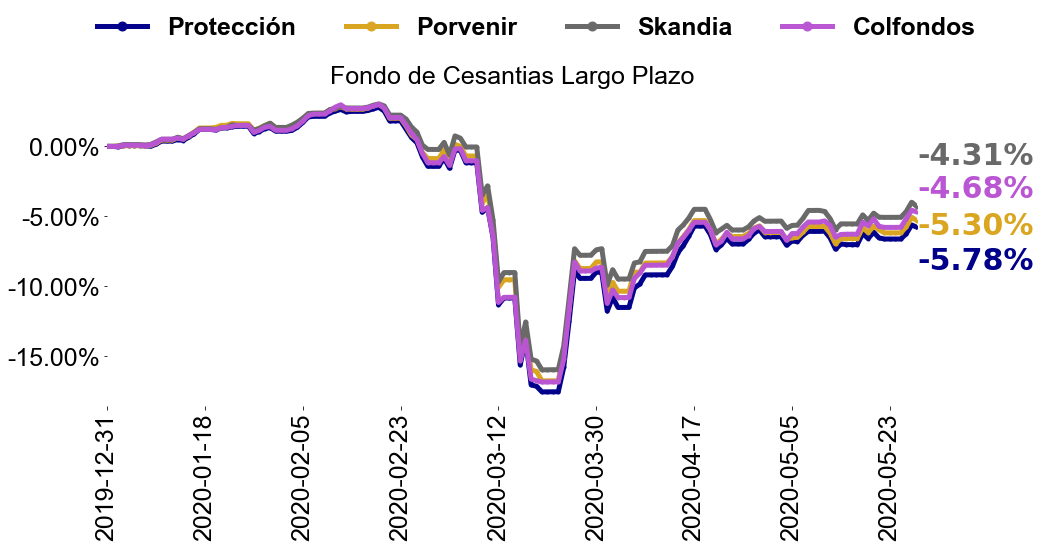

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager

df = pd.read_csv('D:/andrgome/Documents/BDPython/BD_PENSIONESOBL.csv',encoding='latin-1')

Tipo_Fondo = 'Fondo de Cesantias Largo Plazo'
Fecha_inicial = '2019-12-31'
Fecha_final = '2020-05-28'
x = ((pd.to_datetime(Fecha_final)-pd.to_datetime(Fecha_inicial))/8).days

# #Apliquemos filtros
df1 = df[df['Nombre_Fondo'].isin([Tipo_Fondo])]   #Filtro 1
df1['Fecha'] = pd.to_datetime(df1['Fecha'])
df1.set_index('Fecha', inplace=True)
df1.sort_values(by=['Fecha'],inplace=True)
df1 = df1.loc[Fecha_inicial:Fecha_final]
df1['Valor Unidad'] = df1['Valor Unidad'].astype(float) #Convertir a float la columna tasa

#Protección
df_prot = df1.loc[df1['Nombre_Entidad'].isin(["Proteccion"])]
df_prot['retorno_diario'] = df_prot['Valor Unidad'][1:].values/df_prot['Valor Unidad'][:-1]-1
df_prot['retorno_acumulado']=(1 + df_prot['retorno_diario']).cumprod() - 1
df_prot['retorno_acumulado'][1:]=df_prot['retorno_acumulado'][:-1]
df_prot.iloc[0,6]=0

#Porvenir
df_porv = df1.loc[df1['Nombre_Entidad'].isin(["Porvenir"])]
df_porv['retorno_diario'] = df_porv['Valor Unidad'][1:].values/df_porv['Valor Unidad'][:-1]-1
df_porv['retorno_acumulado']=(1 + df_porv['retorno_diario']).cumprod() - 1
df_porv['retorno_acumulado'][1:]=df_porv['retorno_acumulado'][:-1]
df_porv.iloc[0,6]=0

#Skandia
df_skandia = df1.loc[df1['Nombre_Entidad'].isin(["Skandia Pensiones Y Cesantías S.A., Old Mutual Pensiones Y Cesantías S.A."])]
df_skandia['retorno_diario'] = df_skandia['Valor Unidad'][1:].values/df_skandia['Valor Unidad'][:-1]-1
df_skandia['retorno_acumulado']=(1 + df_skandia['retorno_diario']).cumprod() - 1
df_skandia['retorno_acumulado'][1:]=df_skandia['retorno_acumulado'][:-1]
df_skandia.iloc[0,6]=0

#Colfondos
df_colfondos = df1.loc[df1['Nombre_Entidad'].isin(["Colfondos S.A. Pensiones Y Cesantias"])]
df_colfondos['retorno_diario'] = df_colfondos['Valor Unidad'][1:].values/df_colfondos['Valor Unidad'][:-1]-1
df_colfondos['retorno_acumulado']=(1 + df_colfondos['retorno_diario']).cumprod() - 1
df_colfondos['retorno_acumulado'][1:]=df_colfondos['retorno_acumulado'][:-1]
df_colfondos.iloc[0,6]=0

tick_spacing = x
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=25)

# #Gráfico
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df_prot.index,df_prot['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='darkblue',alpha = 0.99,label='Protección',markersize=3)
ax.plot(df_porv.index,df_porv['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='goldenrod',alpha = 0.99,label='Porvenir',markersize=3)
ax.plot(df_skandia.index,df_skandia['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='dimgrey',alpha = 0.99,label='Skandia',markersize=3)
ax.plot(df_colfondos.index,df_colfondos['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='mediumorchid',alpha = 0.99,label='Colfondos',markersize=3)
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.1, 1.3),ncol=4,markerscale=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=25)
plt.xticks(fontname = "Arial",fontsize=25)
ax.set_title(Tipo_Fondo, fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax.title.set_fontfamily('arial')
plt.axis([Fecha_inicial, Fecha_final, None, None])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.subplots_adjust(bottom=0.1, right=2.0, top=1.2)
plt.box(on=None)

r_porv = df_porv[['retorno_acumulado']].iloc[-1].values[0]
r_prot = df_prot[['retorno_acumulado']].iloc[-1].values[0]
r_colf = df_colfondos[['retorno_acumulado']].iloc[-1].values[0]
r_skan = df_skandia[['retorno_acumulado']].iloc[-1].values[0]
y = {"goldenrod": r_porv,"darkblue":r_prot, "mediumorchid": r_colf,"dimgrey": r_skan}
colores = sorted(y, key=y.__getitem__)
rentabilidades = sorted(y.values())

plt.text(df_porv.index[-1], rentabilidades[0]-0.03, '{0:.2%}'.format(rentabilidades[0]), color=colores[0], fontsize=30,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[1]-0.01, '{0:.2%}'.format(rentabilidades[1]), color=colores[1], fontsize=30,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[2]+0.01, '{0:.2%}'.format(rentabilidades[2]), color=colores[2], fontsize=30,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[3]+0.03, '{0:.2%}'.format(rentabilidades[3]), color=colores[3], fontsize=30,weight='bold')

plt.show()